<a href="https://colab.research.google.com/github/y00628/hip-hop/blob/main/hillary_trump_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Preprocessing and EDA

In [168]:
# Making sure the file is readable by Pandas

with open('genius_hip_hop_lyrics.csv', 'r', encoding='utf-8', errors='ignore') as file:
    content = file.read()

with open('genius_hip_hop_lyrics_cleaned.csv', 'w', encoding='utf-8') as file:
    file.write(content)

hip_hop = pd.read_csv('genius_hip_hop_lyrics_cleaned.csv')

hip_hop = hip_hop.set_index('id')

hip_hop.head()

,candidate,song,artist,sentiment,theme,album_release_date,line,url
id,,,,,,,,
1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...
2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics
3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics
4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics
5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics


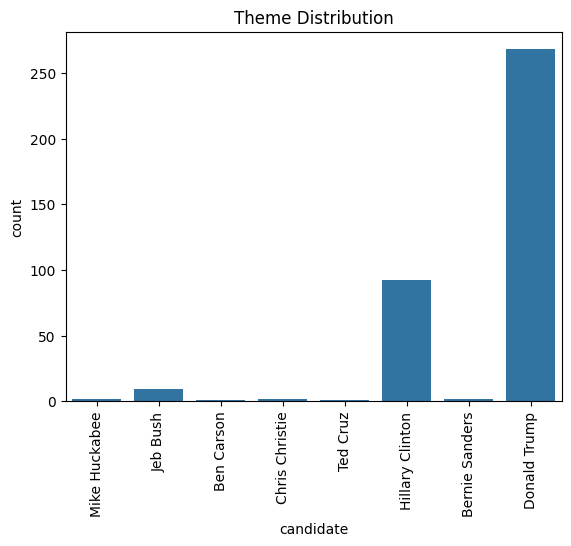

In [169]:
sns.countplot(x='candidate', data=hip_hop)
plt.title('Theme Distribution')
plt.xticks(rotation=90)
plt.show()


In [170]:
hip_hop_subset = hip_hop[['candidate', 'line']]
hip_hop_subset = hip_hop_subset[hip_hop_subset['candidate'].isin(['Donald Trump', 'Hillary Clinton'])]
hip_hop_subset

,candidate,line
id,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa..."
17,Hillary Clinton,Until we really saw the true problem / Even Hi...
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch..."
...,...,...
374,Donald Trump,Bitches got bumps and I'm rich just like Donal...
375,Donald Trump,"The world gon' end real soon, especially if Tr..."
376,Donald Trump,I've seen more holes than a golf course on Don...


In [171]:
hip_hop_subset['candidate'].value_counts()

candidate
Donald Trump       268
Hillary Clinton     92
Name: count, dtype: int64

### 3. Text Preprocessing

In [172]:
import nltk
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from gensim.models import Word2Vec


In [173]:
def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  return list(filter(lambda x: x not in stop_words, tokens))

In [174]:
def preprocess_lyrics(lyrics):
  result = re.sub(r'\d+', '', lyrics.lower())
  result = re.sub(r'^[^a-zA-Z0-9]+', '', result)

  tokens = word_tokenize(result)
  stop_words = set(stopwords.words('english'))
  tokens_filtered = list(filter(lambda x: x not in stop_words and x.isalpha(), tokens))

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_filtered]

  return ' '.join(lemmatized_tokens)

In [175]:
hip_hop_subset['lyrics_processed'] = hip_hop_subset['line'].apply(preprocess_lyrics)
hip_hop_subset

,candidate,line,lyrics_processed
id,,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa...",hillary clinton ai gon like fanning next serpent
17,Hillary Clinton,Until we really saw the true problem / Even Hi...,really saw true problem even hilary could rob
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...,would stay like hillary even thought killin
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...,makin call lewinski fuckin like hilary
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch...",hillary said frighten alarm go choking teeth w...
...,...,...,...
374,Donald Trump,Bitches got bumps and I'm rich just like Donal...,bitch got bump rich like donald trump
375,Donald Trump,"The world gon' end real soon, especially if Tr...",world gon end real soon especially trump get e...
376,Donald Trump,I've seen more holes than a golf course on Don...,seen hole golf course donald trump course


### 4. Extract most common k words

In [176]:
def get_freq_dist(candidate):
    all_words = []
    for words in hip_hop_subset[hip_hop_subset['candidate'] == candidate]['lyrics_processed']:
        all_words.extend(words.split(' '))

    return FreqDist(all_words)

In [177]:
def most_common_k_words(candidate, k):
  lst_and_frq = get_freq_dist(candidate).most_common(k)
  return [tup[0] for tup in lst_and_frq]

In [178]:
trump_common = most_common_k_words(candidate='Donald Trump', k=15)
trump_common

['trump',
 'donald',
 'like',
 'tower',
 'get',
 'got',
 'money',
 'fuck',
 'n',
 'ai',
 'bitch',
 'fire',
 'call',
 'shit',
 'man']

In [179]:
clinton_common = most_common_k_words(candidate='Hillary Clinton', k=15)
clinton_common

['hillary',
 'clinton',
 'like',
 'bill',
 'hilary',
 'rodham',
 'bitch',
 'obama',
 'fuck',
 'got',
 'gon',
 'even',
 'call',
 'white',
 'ai']

In [180]:
analyzer = SentimentIntensityAnalyzer()

In [181]:

hip_hop_subset['contains_common_word'] = hip_hop_subset['lyrics_processed'].apply(lambda x: any(word in x.lower() for word in common_words))
#hip_hop_subset[hip_hop_subset['candidate'] == 'Hillary Clinton']['contains_common_word'] = hip_hop_subset[hip_hop_subset['candidate'] == 'Hillary Clinton']['lyrics_processed'].apply(lambda x: any(word in x.lower() for word in most_common_k_words(candidate='Hillary Clinton', k=15)))
hip_hop_subset
trump_clinton = hip_hop_subset[hip_hop_subset['contains_common_word']]

#analyzer.polarity_scores(most_common_k_words(candidate='Hillary Clinton', k=15))

In [182]:
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [183]:
analyzer = SentimentIntensityAnalyzer()
trump_clinton['polarity_scores'] = hip_hop_subset['lyrics_processed'].apply(get_sentiment_score)
trump_clinton

<ipython-input-183-80bab334cf6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_clinton['polarity_scores'] = hip_hop_subset['lyrics_processed'].apply(get_sentiment_score)


,candidate,line,lyrics_processed,contains_common_word,polarity_scores
id,,,,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa...",hillary clinton ai gon like fanning next serpent,True,0.3612
17,Hillary Clinton,Until we really saw the true problem / Even Hi...,really saw true problem even hilary could rob,True,-0.5401
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...,would stay like hillary even thought killin,True,0.3612
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...,makin call lewinski fuckin like hilary,True,0.3612
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch...",hillary said frighten alarm go choking teeth w...,True,-0.7783
...,...,...,...,...,...
374,Donald Trump,Bitches got bumps and I'm rich just like Donal...,bitch got bump rich like donald trump,True,0.3182
375,Donald Trump,"The world gon' end real soon, especially if Tr...",world gon end real soon especially trump get e...,True,0.0000
376,Donald Trump,I've seen more holes than a golf course on Don...,seen hole golf course donald trump course,True,0.0000
